In [1]:
import sys
sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')
import PIL.Image as Image
import numpy as np
import matplotlib.pyplot as plt
import imgaug as ia
from imgaug import augmenters as iaa
ia.seed(123)
%matplotlib inline

(280, 280, 4)


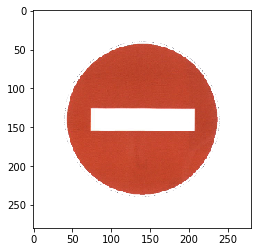

In [2]:
patch = Image.open('r1.png')
arr = np.asarray(patch)
print(arr.shape)
plt.imshow(arr)
plt.show()

In [3]:
seq = iaa.Sequential([
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
#     iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),
    iaa.OneOf([iaa.GaussianBlur(sigma=(0, 3.0)),
              iaa.AverageBlur(k=(2,7)),
              iaa.MedianBlur(k=(3,11))]),
    # Strengthen or weaken the contrast in each image.
    iaa.ContrastNormalization((0.75, 1.5)),
    # Add gaussian noise.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, rotate them
    iaa.Affine(scale={"x": (0.1, 0.7), "y": (0.1, 0.7)}, rotate=(-20, 20))
], random_order=True)

In [4]:
arr_aug = seq.augment_image(arr)

(280, 280, 4)


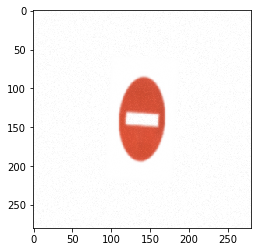

In [5]:
print(arr_aug.shape)
plt.imshow(arr_aug)
plt.show()

With shear in iaa.Affine

(1024, 1280, 3)


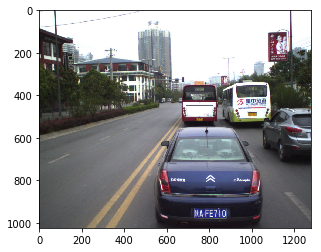

In [6]:
base = Image.open('TSD-Signal-00002-00000.png')
base_arr = np.asarray(base)
print(base_arr.shape)
plt.imshow(base_arr)
plt.show()

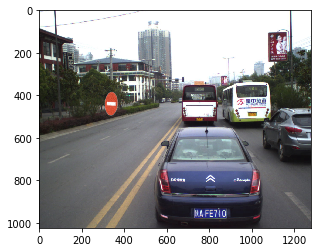

In [7]:
patch_aug = Image.fromarray(arr_aug)
base.paste(patch_aug, (200, 300), patch_aug)
arr_base = np.asarray(base)
plt.imshow(arr_base)
plt.show()

In [8]:
base.show()